In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

ELA_0 = np.genfromtxt("ELA_spitsbergen.txt")

[x1,y1] = np.genfromtxt("elevation_1.txt")

tributary_data = np.genfromtxt('Glacierbuckets.csv', delimiter=";", skip_header=1, usecols=(1,2,3,4,5,6,7))

w = veteranen_width = 2930

try:
    parameters = [alpha, beta, nu, kappa, c, w, L0, E0s, E0w] = np.genfromtxt("parameters_veteranen.txt")
except OSError:
    parameters = [alpha, beta, nu, kappa, c, w, L0, E0s, E0w] = [3, 0.007, 10, 0.5, 1, w, 1, 100, 100]
    
figsize = (8,4)
dpi = 300

## Response

In [2]:
summer = CustomBedModel(x1, y1, name="Summer --> Winter", L0=42000, w=veteranen_width)
winter = CustomBedModel(x1, y1, name="Winter --> Summer", L0=60000, w=veteranen_width)

glaciers = [winter, summer]

for glacier in glaciers:
    for [L, w0, h0, w1, h1, s, q] in tributary_data:
        glacier.add_bucket_tributary(L, w0, w1, h0, h1)

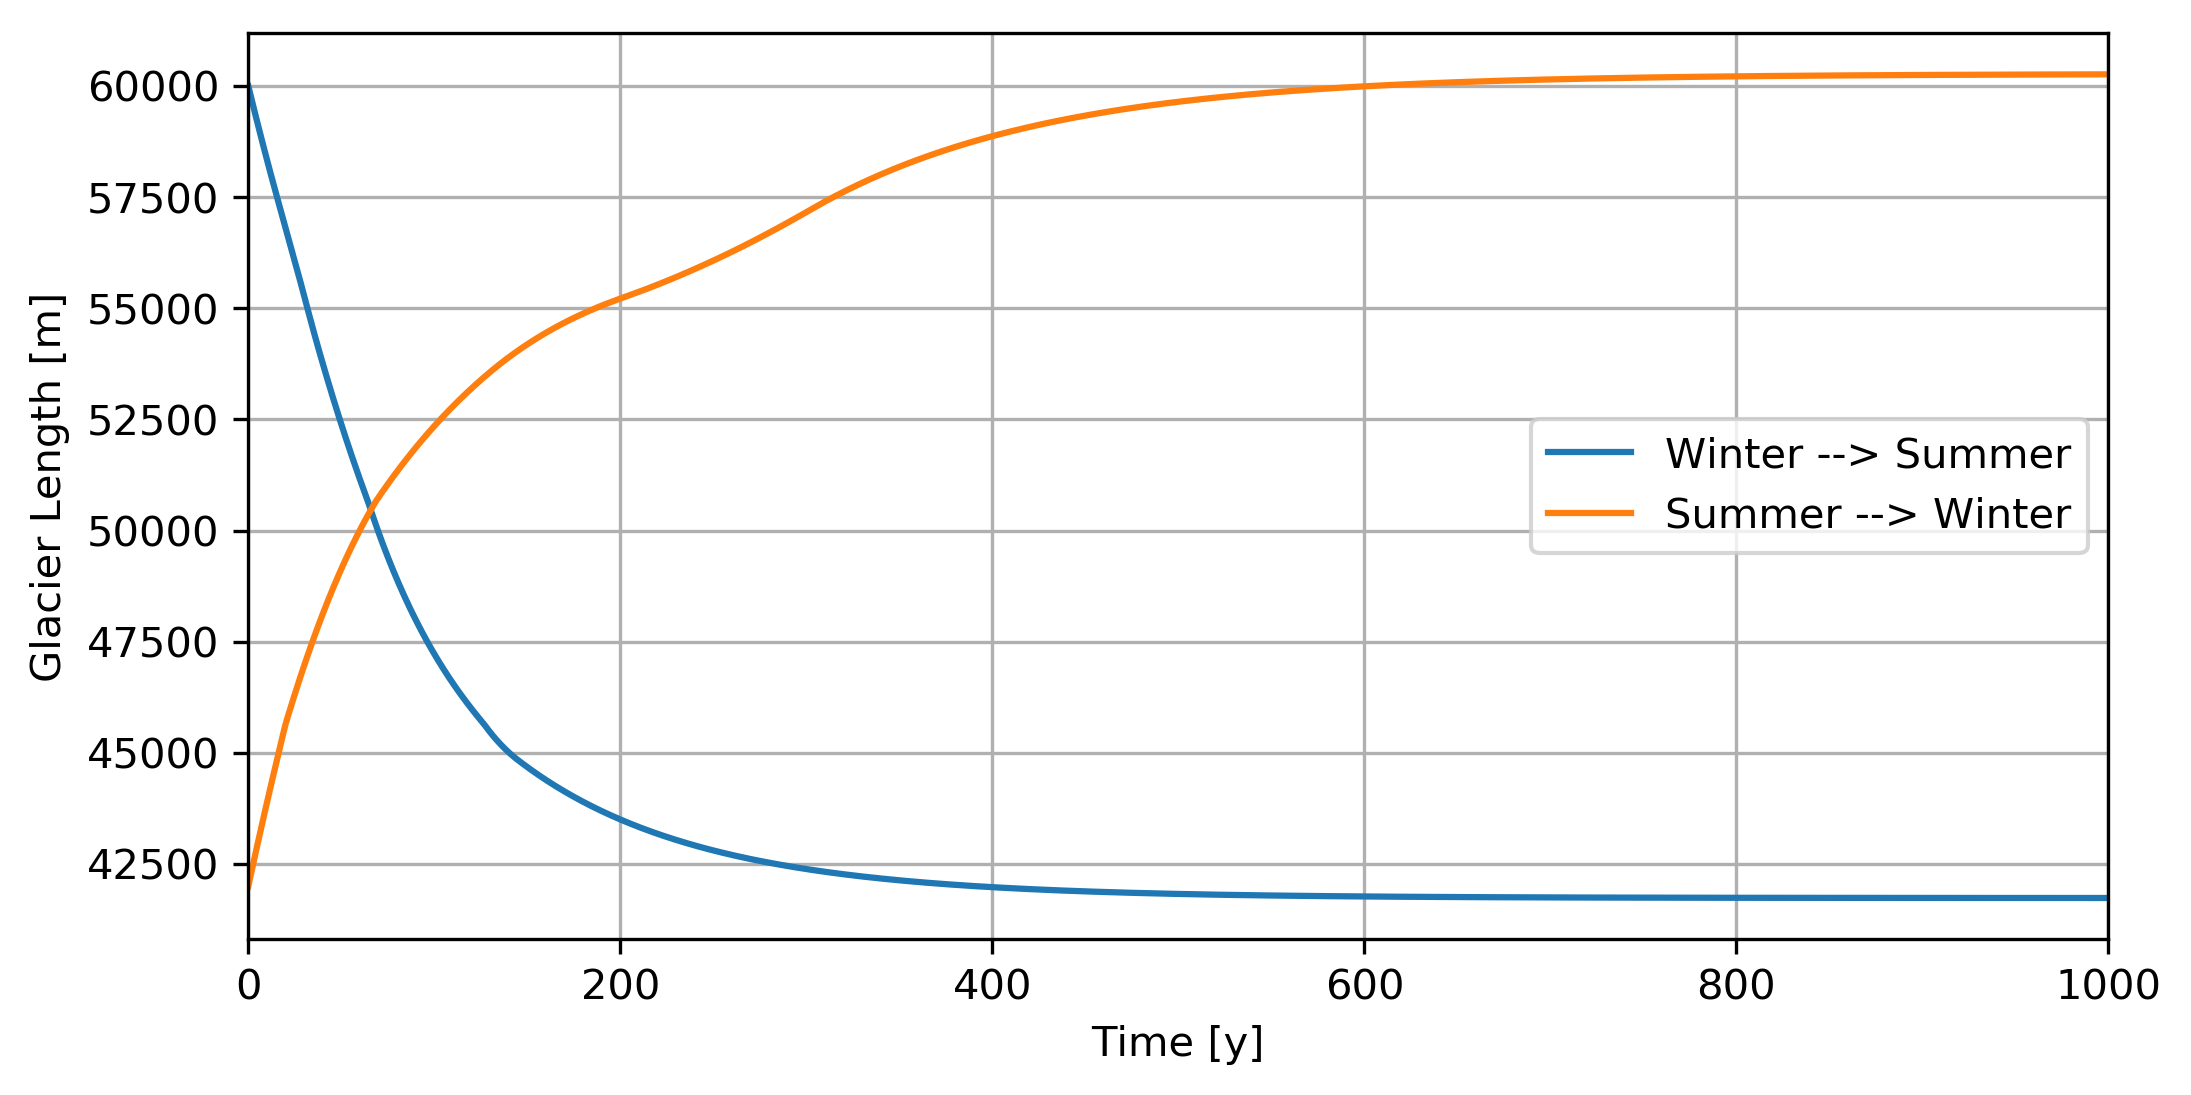

In [3]:
dt = 0.5
t = 1000

plt.figure(figsize=figsize, dpi=dpi)

for glacier in glaciers:
    glacier.alpha = alpha
    glacier.beta = beta
    glacier.nu = nu
    glacier.kappa = kappa
    glacier.c = c

summer.integrate(dt=dt, time=t, E=600)
winter.integrate(dt=dt, time=t, E=840)
    
for glacier in glaciers:
    plt.plot(glacier.t, glacier.L, label=glacier.name)
    
plt.legend()
plt.grid()
# plt.title("Glacier length")

# plt.plot([np.min(summer.t), np.max(summer.t)], 2*[42000], "--", c="gray", linewidth=1) # real summer
# plt.plot([np.min(summer.t), np.max(summer.t)], 2*[60000], "--", c="gray", linewidth=1) # real winter

plt.xlim([np.min(summer.t), np.max(summer.t)])
plt.xlabel("Time [y]")
plt.ylabel("Glacier Length [m]")
if np.max(summer.t) == t:
    plt.savefig("figures/response.png")
plt.show()

## ELA-calibration Summer

In [4]:
glacier = CustomBedModel(x1, y1, w=veteranen_width)

glaciers = [glacier]

for glacier in glaciers:
    for [L, w0, h0, w1, h1, s, q] in tributary_data:
        glacier.add_bucket_tributary(L, w0, w1, h0, h1)

[1.20000000e+00 5.00000000e-03 1.00000000e+01 3.00000000e-01
 1.20000000e+00 2.93000000e+03 4.22393609e+04 2.00000000e+02]
42239.36089150994


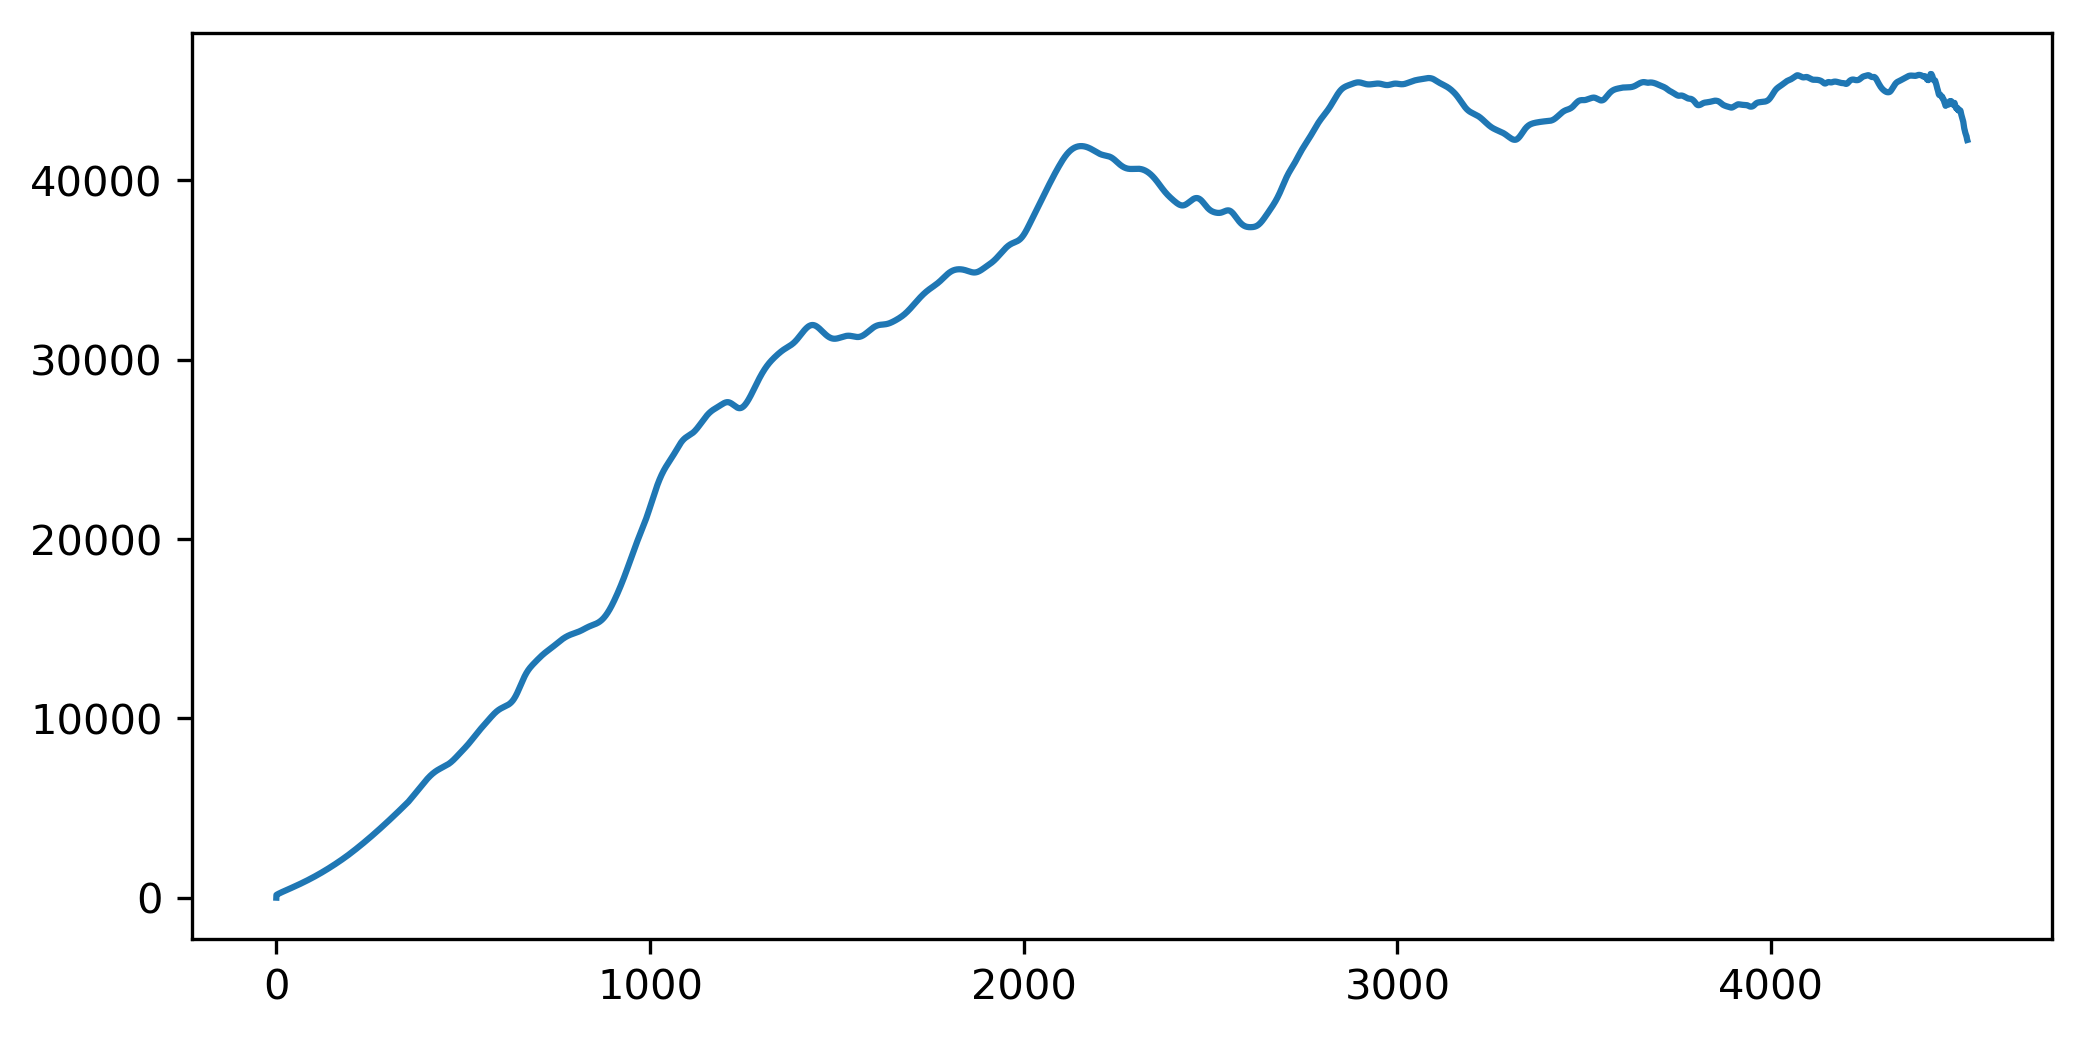

In [5]:
t = 1 #year
dt = 0.1
E0 = 200

plt.figure(figsize=figsize, dpi=dpi)

for glacier in glaciers:
    glacier.alpha = 1.2
    glacier.beta = 0.005#0.003
    glacier.nu = 10
    glacier.kappa = 0.3#0.4
    glacier.c = 1.2
    
for i in range(np.shape(ELA_0)[0]-1):
    # change E at the start of each year
    glaciers[0].integrate(dt, t, E=ELA_0[i+1,1]+E0)
    
plt.plot(glaciers[0].t, glaciers[0].L)
    
parameters = [alpha, beta, nu, kappa, c, w, L0, E0] = np.array([glaciers[0].alpha, glaciers[0].beta, glaciers[0].nu, glaciers[0].kappa, glaciers[0].c, glaciers[0].w, glaciers[0].L_last, E0])
print(parameters)
print(glaciers[0].L[-1])

# np.savetxt("parameters_veteranen.txt", parameters)
plt.show()

E0_summer = E0

## ELA-calibration Winter

In [6]:
glacier = CustomBedModel(x1, y1, w=veteranen_width)

glaciers = [glacier]

for glacier in glaciers:
    for [L, w0, h0, w1, h1, s, q] in tributary_data:
        glacier.add_bucket_tributary(L, w0, w1, h0, h1)

[1.20000000e+00 5.00000000e-03 1.00000000e+01 3.00000000e-01
 1.20000000e+00 2.93000000e+03 4.22393609e+04 2.00000000e+02]
63599.99032519772


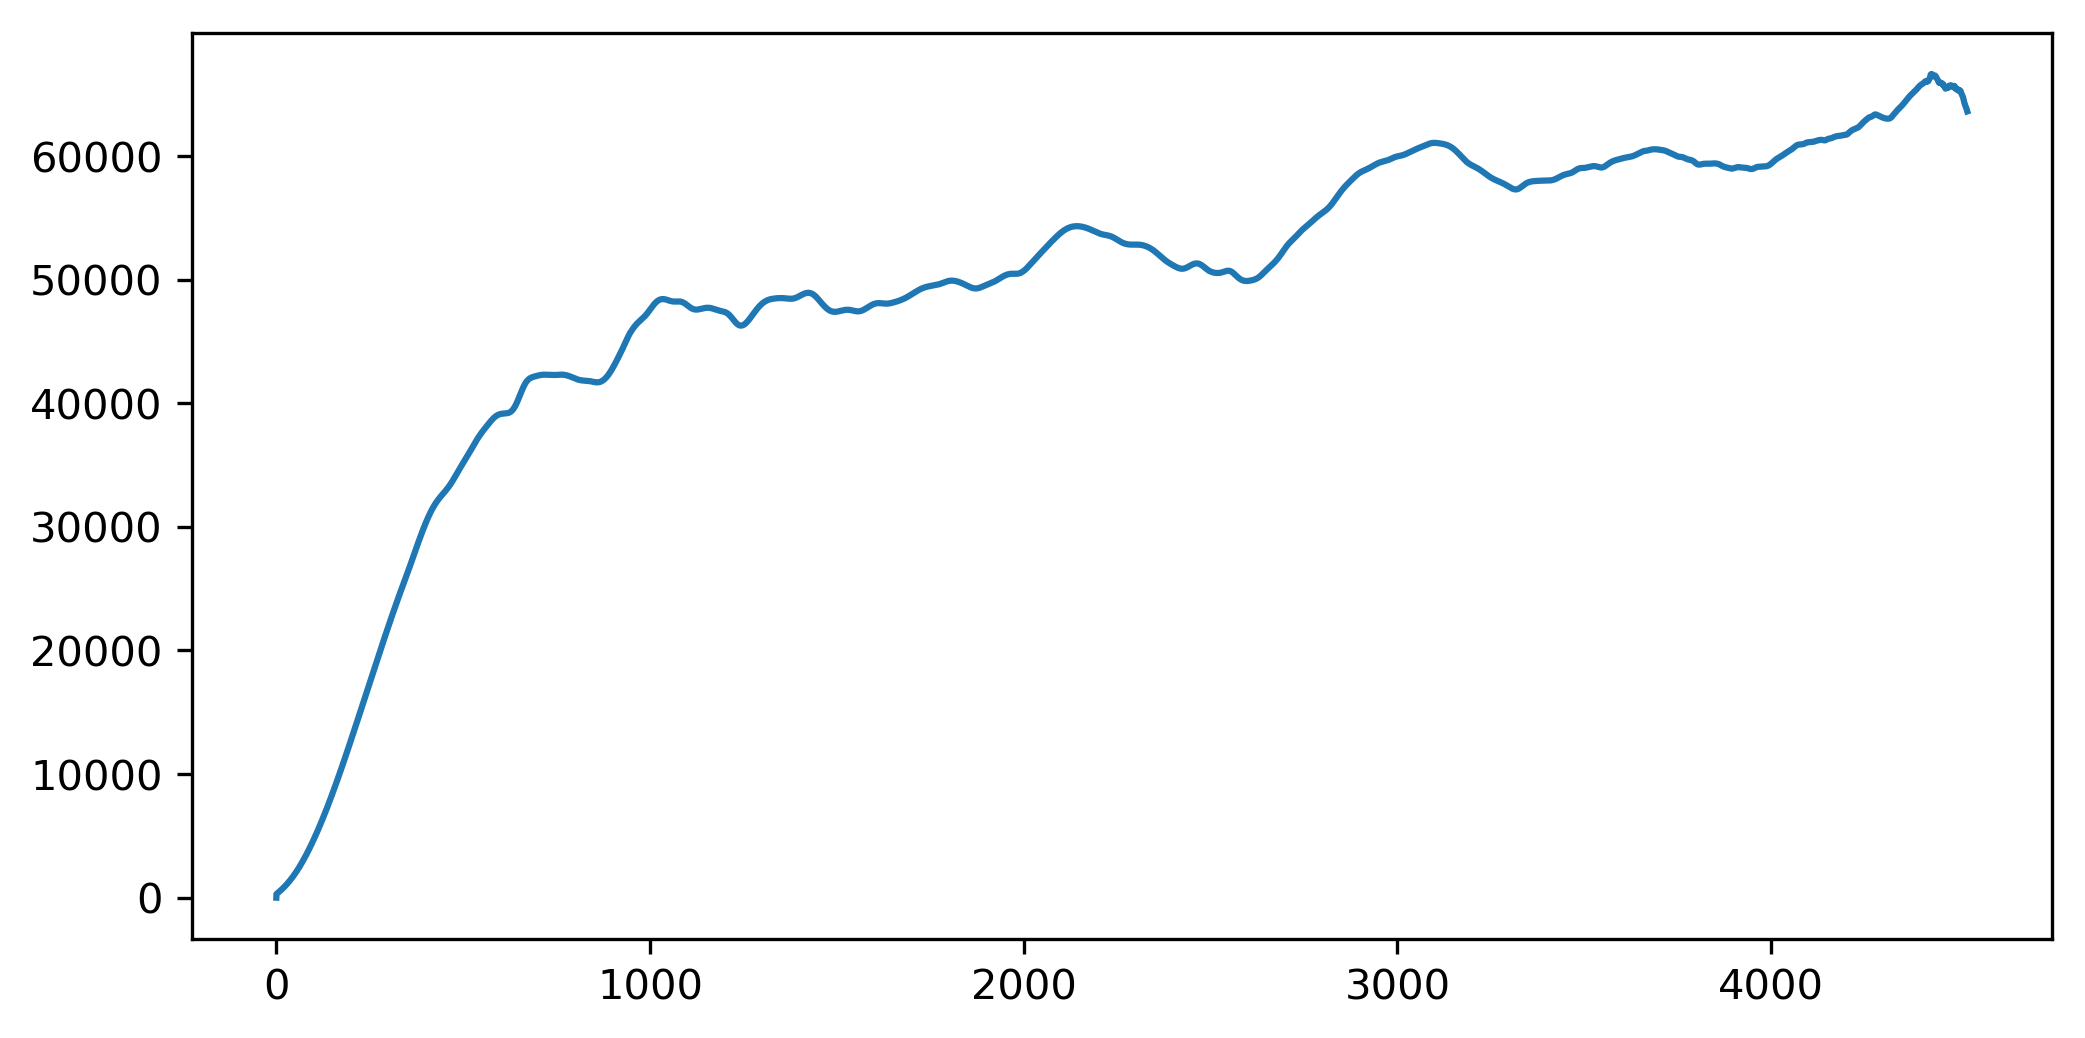

In [7]:
t = 1 #year
dt = 0.1
E0 = 5

plt.figure(figsize=figsize, dpi=dpi)

for glacier in glaciers:
    glacier.alpha = 1.2
    glacier.beta = 0.005#0.003
    glacier.nu = 10
    glacier.kappa = 0.3#0.4
    glacier.c = 1.2
    
for i in range(np.shape(ELA_0)[0]-1):
    # change E at the start of each year
    glaciers[0].integrate(dt, t, E=ELA_0[i+1,1]+E0)
    
plt.plot(glaciers[0].t, glaciers[0].L)

print(parameters)
print(glaciers[0].L[-1])

E0_winter = E0

plt.show()

In [8]:
parameters = [alpha, beta, nu, kappa, c, w, L0, E0_summer, E0_winter] = np.array([glaciers[0].alpha, glaciers[0].beta, glaciers[0].nu, glaciers[0].kappa, glaciers[0].c, glaciers[0].w, glaciers[0].L_last, E0_summer, E0_winter])
np.savetxt("parameters_veteranen.txt", parameters)